# Assignment # 06

### Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Task 1: Exploratory Data Analysis (EDA)

Objective: Perform initial data exploration to gain insights and understand the Titanic dataset.

### Load the Titanic dataset

In [2]:
titanic_df = pd.read_csv('./datasets/titanic_dataset.csv')

### Display the first 5 rows of the dataset

In [3]:
print("First 5 rows:")
print(titanic_df.head())

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

### Display the last 5 rows of the dataset

In [4]:
print("\nLast 5 rows:")
print(titanic_df.tail())


Last 5 rows:
     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


### Check the dimensions of the dataset

In [5]:
print("\nDimensions of the dataset:", titanic_df.shape)


Dimensions of the dataset: (891, 12)


### Identify the data types of each feature.

In [6]:
print(titanic_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Explore categorical features

In [7]:
print("\nCount of unique values in categorical features:")
print(titanic_df.select_dtypes(include='object').nunique())


Count of unique values in categorical features:
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64


### Investigate missing values

In [8]:
missing_values = titanic_df.isnull().sum()
percentage_missing = (missing_values / len(titanic_df)) * 100
print("\nMissing values for each feature:")
print(pd.concat([missing_values, percentage_missing], axis=1, keys=['Total', 'Percentage']))


Missing values for each feature:
             Total  Percentage
PassengerId      0    0.000000
Survived         0    0.000000
Pclass           0    0.000000
Name             0    0.000000
Sex              0    0.000000
Age            177   19.865320
SibSp            0    0.000000
Parch            0    0.000000
Ticket           0    0.000000
Fare             0    0.000000
Cabin          687   77.104377
Embarked         2    0.224467


## Task 2: Handling Missing Values

Objective: Implement strategies to handle missing values in the Titanic dataset

### Check the dimension of dataset using the .shape() function.

In [9]:
print("Original dimensions of the dataset:", titanic_df.shape)

Original dimensions of the dataset: (891, 12)


### Determine the percentage of missing values for each feature

In [10]:
percentage_missing = (titanic_df.isnull().sum() / len(titanic_df)) * 100
print("\nPercentage of missing values in each feature:")
print(percentage_missing)


Percentage of missing values in each feature:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


### Remove the missing values from the dataset.

In [11]:
titanic_df = titanic_df.dropna()

### Again, check the number of missing values in dataset.

In [12]:
print("Dimensions after removing missing values:", titanic_df.shape)

Dimensions after removing missing values: (183, 12)


### Check for duplicate values in the dataset and display the number of duplicate rows

In [13]:
duplicate_rows = titanic_df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

Number of duplicate rows: 0


### Remove the duplicate rows from the dataset

In [14]:
titanic_df = titanic_df[~duplicate_rows]

### Again, display the number of rows of data frame to verify the duplicate values are removed

In [15]:
print("Dimensions after removing duplicates:", titanic_df.shape)

Dimensions after removing duplicates: (183, 12)


## Task 3: Descriptive Statistics

Objective: Calculate and interpret descriptive statistics to gain insights into the Titanic dataset.

### Calculate basic summary statistics - describe

In [16]:
print("Summary statistics for numerical features:")
print(titanic_df.describe())

Summary statistics for numerical features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   183.000000  183.000000  183.000000  183.000000  183.000000   
mean    455.366120    0.672131    1.191257   35.674426    0.464481   
std     247.052476    0.470725    0.515187   15.643866    0.644159   
min       2.000000    0.000000    1.000000    0.920000    0.000000   
25%     263.500000    0.000000    1.000000   24.000000    0.000000   
50%     457.000000    1.000000    1.000000   36.000000    0.000000   
75%     676.000000    1.000000    1.000000   47.500000    1.000000   
max     890.000000    1.000000    3.000000   80.000000    3.000000   

            Parch        Fare  
count  183.000000  183.000000  
mean     0.475410   78.682469  
std      0.754617   76.347843  
min      0.000000    0.000000  
25%      0.000000   29.700000  
50%      0.000000   57.000000  
75%      1.000000   90.000000  
max      4.000000  512.329200  


### Calculate the basic summary statistics - quantile

In [19]:
# Select the numerical columns from the dataset
numerical_columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Calculate summary statistics using .quantile()
quantiles = titanic_df[numerical_columns].quantile([0, 0.25, 0.5, 0.75, 1.0])

print("\nQuantiles for numerical features:")
print(quantiles)


Quantiles for numerical features:
      Survived  Pclass    Age  SibSp  Parch      Fare
0.00       0.0     1.0   0.92    0.0    0.0    0.0000
0.25       0.0     1.0  24.00    0.0    0.0   29.7000
0.50       1.0     1.0  36.00    0.0    0.0   57.0000
0.75       1.0     1.0  47.50    1.0    1.0   90.0000
1.00       1.0     3.0  80.00    3.0    4.0  512.3292


### Calculate the correlation matrix for all numerical features

In [21]:
# Select only the numerical columns
numerical_columns = titanic_df.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000  0.148495 -0.089136  0.030933 -0.083488 -0.051454   
Survived        0.148495  1.000000 -0.034542 -0.254085  0.106346  0.023582   
Pclass         -0.089136 -0.034542  1.000000 -0.306514 -0.103592  0.047496   
Age             0.030933 -0.254085 -0.306514  1.000000 -0.156162 -0.271271   
SibSp          -0.083488  0.106346 -0.103592 -0.156162  1.000000  0.255346   
Parch          -0.051454  0.023582  0.047496 -0.271271  0.255346  1.000000   
Fare            0.029740  0.134241 -0.315235 -0.092424  0.286433  0.389740   

                 Fare  
PassengerId  0.029740  
Survived     0.134241  
Pclass      -0.315235  
Age         -0.092424  
SibSp        0.286433  
Parch        0.389740  
Fare         1.000000  


### Visualize the correlation matrix using a heatmap

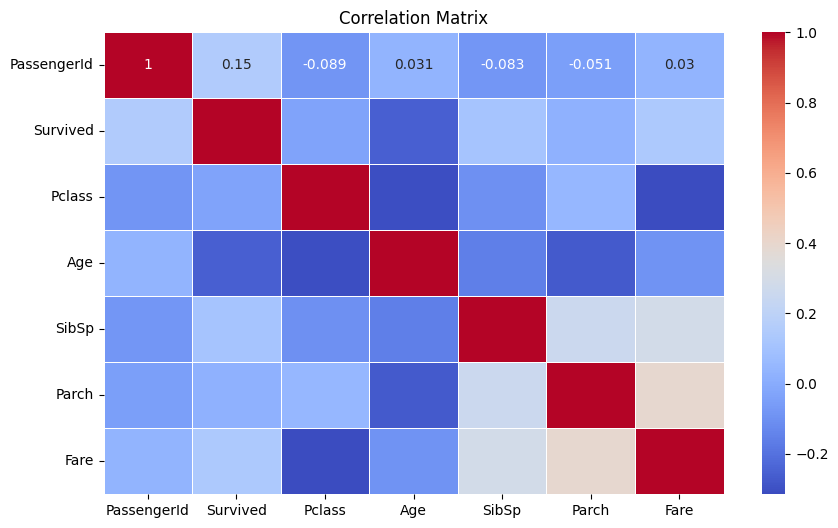

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()